<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание данных

Технологический процесс  
Rougher feed — исходное сырье  
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant   
Xanthate **— ксантогенат (промотер, или активатор флотации);  
Sulphate — сульфат (на данном производстве сульфид натрия);  
Depressant — депрессант (силикат натрия).  
Rougher process (англ. «грубый процесс») — флотация  
Rougher tails — отвальные хвосты  
Float banks — флотационная установка  
Cleaner process — очистка  
Rougher Au — черновой концентрат золота  
Final Au — финальный концентрат золота  


Параметры этапов  
air amount — объём воздуха   
fluid levels — уровень жидкости  
feed size — размер гранул сырья  
feed rate — скорость подачи  

Наименование признаков должно быть такое:  
[этап].[тип_параметра].[название_параметра]  

Пример: rougher.input.feed_ag  


Возможные значения для блока [этап]:  
rougher — флотация  
primary_cleaner — первичная очистка  
secondary_cleaner — вторичная очистка  
final — финальные характеристики  
Возможные значения для блока [тип_параметра]:  
input — параметры сырья  
output — параметры продукта  
state — параметры, характеризующие текущее состояние этапа  
calculation — расчётные характеристики 



## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [3]:
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [4]:
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [5]:
#проверим корректность расчета эффективности обогащения 


data_train['rougher.output.recovery_chek'] = ((data_train['rougher.output.concentrate_au'] 
                                               * (data_train['rougher.input.feed_au'] - 
                                                  data_train['rougher.output.tail_au'])) / (data_train['rougher.input.feed_au'] 
                                                                                            * (data_train['rougher.output.concentrate_au'] - 
                                                                                               data_train['rougher.output.tail_au']))) * 100

MAE = mean_absolute_error(data_train['rougher.output.recovery'], data_train['rougher.output.recovery_chek'])
MAE

9.73512347450521e-15

Для проверки корректности расчета результирующей метрики оценили MAE между данными в таблице и контрольным расчетом. 
Судя по результату близкому к нулю - метрика рассчитана корректно, миниимальные различия могут быть связаны с округлением.

In [6]:
#сравним признаки в двух наборах данных - обучающем и тестовом
unique = []
for i in range(len(list(data_train.columns))):
    if list(data_train.columns)[i] not in list(data_test.columns):
        unique.append(list(data_train.columns)[i])
unique

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовом наборе данных отсутствуют признаки, связанные с объемом материалов, полученных на выходе после обработки. Вероятно это связано с тем, что в реальных данных до проведения каждого этапа мы не можем знать, сколько получим на выходе каждого элемента и нам нужно эти данные уметь получать из имеющихся. 

In [7]:
#проведем предобработку данных, заполним пустые значения близкими по времени замерами, так как нам известно, что они близки по результатам

data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


Мы заполнили пустые значения близкими по дате получения замеров, так как нам известно, что зачастую они близки по значению из-за близкого сбора по времени.

## Анализ данных

In [8]:
def histogram (data):
    data['1'].hist(range=(0,100), bins=20, stacked =True, label = 'rougher')
    data['2'].hist(range=(0,100), bins=20, stacked =True, label = 'primary_cleaner')
    data['3'].hist(range=(0,100), bins=20, stacked =True, label = 'secondary_cleaner')
    plt.title('Содержание золота на разных этапах ')
    plt.ylabel('Количество замеров')
    plt.xlabel('Концентрация')
    plt.legend()
    plt.show()
    print(data)

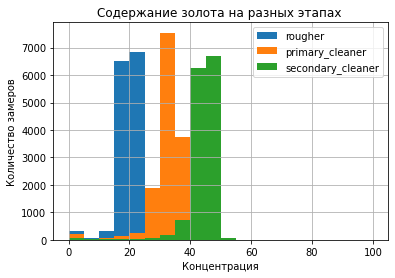

               1          2          3
0      19.793808  34.174427  42.192020
1      20.050975  34.118526  42.701629
2      19.737170  33.969464  42.657501
3      19.320810  28.260743  42.689819
4      19.216101  33.044932  42.774141
...          ...        ...        ...
14144  18.603550  32.940215  46.713954
14145  18.441436  32.925325  46.866780
14146  15.111231  31.856742  46.795691
14147  17.834772  30.770892  46.408188
14148  17.804134  30.356618  46.299438

[14149 rows x 3 columns]


In [9]:
data_train_con_au = data_train[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
data_train_con_au = data_train_con_au.rename(columns={'rougher.output.concentrate_au': '1', 'primary_cleaner.output.concentrate_au': '2', 'final.output.concentrate_au': '3'})
data_train_con_au
histogram(data_train_con_au)

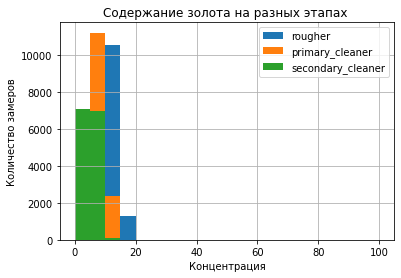

               1         2         3
0      11.500771  8.547551  6.055403
1      11.615865  8.558743  6.029369
2      11.695753  8.603505  6.055926
3      11.915047  7.221879  6.047977
4      12.411054  9.089428  6.148599
...          ...       ...       ...
14144  11.124896  6.559174  3.224920
14145  11.425983  6.612376  3.195978
14146   8.523497  7.128896  3.109998
14147  11.658799  7.490444  3.367241
14148  11.959486  7.537584  3.598375

[14149 rows x 3 columns]


In [10]:
data_train_con_ag = data_train[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
data_train_con_ag = data_train_con_ag.rename(columns={'rougher.output.concentrate_ag': '1', 'primary_cleaner.output.concentrate_ag': '2', 'final.output.concentrate_ag': '3'})

histogram(data_train_con_ag)

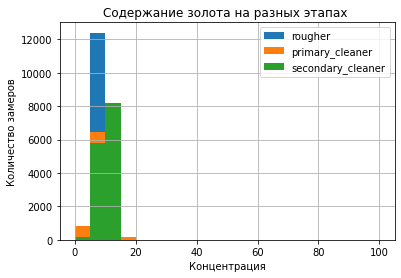

               1          2          3
0       7.101074  10.389648   9.889648
1       7.278807  10.497069   9.968944
2       7.216833  10.354494  10.213995
3       7.175616   8.496563   9.977019
4       7.240205   9.986786  10.142511
...          ...        ...        ...
14144  10.984003  12.445966  11.356233
14145  10.888213  12.623947  11.349355
14146   8.955135  12.633558  11.434366
14147  10.655377  12.012378  11.625587
14148  10.702148  11.650285  11.737832

[14149 rows x 3 columns]


In [11]:
data_train_con_pb = data_train[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
data_train_con_pb = data_train_con_pb.rename(columns={'rougher.output.concentrate_pb': '1', 'primary_cleaner.output.concentrate_pb': '2', 'final.output.concentrate_pb': '3'})

histogram(data_train_con_pb)

В результате обработки руды концентрация золота увеличивается за счет снижения концентрации других металлов, в первую очередь серебра. Концентрация свинца остается примерно одинаковой в ходе всего технологического процесса. 

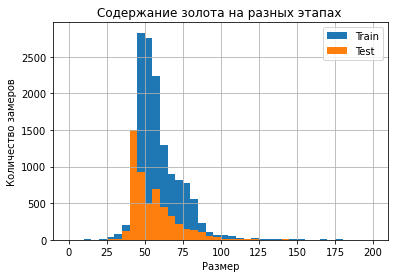

train mean 60.23985599255732
train median 55.269783890501536
test mean 55.952754028895136
test median 50.8468431600362


In [12]:
#Сравним распределение гранул сырья на тестовой и обучающей выборке для того, чтобы проверить корректность создания выборки

data_train['rougher.input.feed_size'].hist(range=(0,200), bins=40, stacked =True, label = 'Train')
data_test['rougher.input.feed_size'].hist(range=(0,200), bins=40, stacked =True, label = 'Test')
plt.title('Содержание золота на разных этапах ')
plt.ylabel('Количество замеров')
plt.xlabel('Размер')
plt.legend()
plt.show()

print('train mean', data_train['rougher.input.feed_size'].mean())
print('train median', data_train['rougher.input.feed_size'].median())
print('test mean', data_test['rougher.input.feed_size'].mean())
print('test median', data_test['rougher.input.feed_size'].median())

Размер гранул сырья в тестовой и обучающей выборке отличаются на ~8%, также как и медиана, при этом с точки зрения распределения размера мы видим аналогичную картину в обеих выборках, из чего можем заключить, что выборки распределены корректно и мы можем работать с представленными данными. 

In [13]:
#Исследуем суммарную концентрацию веществ на разных этапах 

data_train['rougher.output.concentrat_total'] = data_train['rougher.output.concentrate_pb'] + data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_sol']
data_train['primary_cleaner.output.concentrat_total'] = data_train['primary_cleaner.output.concentrate_pb'] + data_train['primary_cleaner.output.concentrate_au'] + data_train['primary_cleaner.output.concentrate_ag'] +  data_train['primary_cleaner.output.concentrate_sol']
data_train['final.output.concentrat_total'] = data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_au'] + data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_sol']
data_train['input.concentrat_total'] = data_train['rougher.input.feed_pb'] + data_train['rougher.input.feed_au'] + data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_sol']


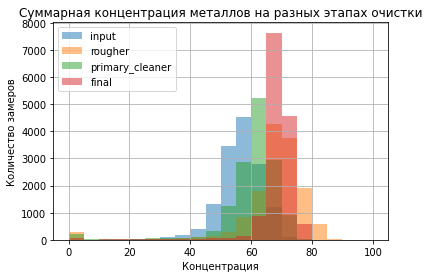

In [14]:
data_train['input.concentrat_total'].hist(alpha=0.5, range=(0,100), bins=20, stacked =True, label = 'input')
data_train['rougher.output.concentrat_total'].hist(alpha=0.5, range=(0,100), bins=20, stacked =True, label = 'rougher')
data_train['primary_cleaner.output.concentrat_total'].hist(alpha=0.5, range=(0,100), bins=20, stacked =True, label = 'primary_cleaner')
data_train['final.output.concentrat_total'].hist(alpha=0.5, range=(0,100), bins=20, stacked =True, label = 'final')
plt.title('Cуммарная концентрация металлов на разных этапах очистки')
plt.ylabel('Количество замеров')
plt.xlabel('Концентрация')
plt.legend()
plt.show()


Суммарная концентрация металлов на всех этапах распределена вокруг ~70%, при этом наблюдаются аномальные наблюдения, в которых суммарное значение находится около нуля. Такие наблюдения искажают данные, соответственно нам необходимо удалить их из данных, с которыми мы работаем. Такие наблюдения могут быть связаны с особенностью технологического процесса, исключительные замеры, в которых в ходе технологического процесса были допущены неточности. 
При этом удалить такие замеры необходимо только из обучающей выборке, так как в тестовой мы еще не знаем, какой на выходе будет концентрат, соответственно предполагаем, что процесс будет проведен корректно. 

In [15]:
data_train.shape

(14149, 92)

In [16]:
#удалим выбросы из обучающей выборки 

data_train = data_train.loc[(data_train['final.output.concentrat_total'] != 0) | (data_train['primary_cleaner.output.concentrat_total'] != 0) | (data_train['rougher.output.concentrat_total'] != 0)]
data_train.shape

(14148, 92)

Мы удалили выбросы из обучающей выборки, видим, что уменьшилась она незначительно и теперь мы можем эффективно с ней работать 

## Модель

In [17]:
#Введем функцию расчета sMAPE

def smape(model, features, target):
    model = model.fit(features, target)
    pred = model.predict(features)
    return 100/len(target) * np.sum(2 * np.abs(pred - target) / (np.abs(target) + np.abs(pred)))

In [18]:
def smape_test(target, pred):
    
    return 100/len(target) * np.sum(2 * np.abs(pred - target) / (np.abs(target) + np.abs(pred)))

In [19]:
def final_smape(rougher, final):
    
    
    return 0.25 * rougher + 0.75 * final

In [20]:
data_train.shape

(14148, 92)

In [21]:
col = []
for i in range(len(list(data_train.columns))):
    if list(data_train.columns)[i] not in list(data_test.columns):
        col.append(list(data_train.columns)[i])
col

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [22]:
#Обучим модель на обучающей выборке 

target = data_train[['rougher.output.recovery', 'final.output.recovery']]
features = data_train.drop(col, axis=1).drop('date', axis=1)


features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14148 entries, 0 to 14148
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               14148 non-null  float64
 1   primary_cleaner.input.depressant            14148 non-null  float64
 2   primary_cleaner.input.feed_size             14148 non-null  float64
 3   primary_cleaner.input.xanthate              14148 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      14148 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      14148 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      14148 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    14148 non-null  float64
 10  primary_cl

In [23]:

scorer = make_scorer(smape_test, greater_is_better=False)

In [24]:
#Линейная регрессия
model= LinearRegression()



print('sMAPE', (-1) * final_smape(cross_val_score(model, features, target[target.columns[0]], cv=5, scoring=scorer), cross_val_score(model, features, target[target.columns[1]], cv=5, scoring=scorer)).mean())

sMAPE 12.34448199314085


In [25]:
#Дерево решений

model = DecisionTreeRegressor(random_state = 12345, max_depth=10)

print('sMAPE', (-1) * final_smape(cross_val_score(model, features, target[target.columns[0]], cv=5, scoring=scorer), cross_val_score(model, features, target[target.columns[1]], cv=5, scoring=scorer)).mean())

sMAPE 16.637038530306103


In [ ]:
#Попробуем улучшить Дерево решений


best_depth = 0
best_score = 17
for depth in range(1, 70, 1):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    model.fit(features, target)
    score = (-1) * final_smape(cross_val_score(model, features, target[target.columns[0]], cv=5, scoring=scorer), cross_val_score(model, features, target[target.columns[1]], cv=5, scoring=scorer)).mean()
    if  score < best_score:
        best_score = score
        best_depth=depth 
        
print (best_score, best_depth)

Лучший результат мы получили при глубине 2. 

In [ ]:
model = DecisionTreeRegressor(random_state = 12345, max_depth=2)
print('sMAPE', (-1) * final_smape(cross_val_score(model, features, target[target.columns[0]], cv=5, scoring=scorer), cross_val_score(model, features, target[target.columns[1]], cv=5, scoring=scorer)).mean())

Мы получили метрику sMAPE лучше для модели Дерево решений, поэтому выбираем ее для дальнейшего использования

In [48]:
#Проверим модель на тестовой выборке

model = DecisionTreeRegressor(random_state = 12345, max_depth=2)
model.fit(features, target)
pred_test = model.predict(data_test.drop('date', axis=1))

ValueError: X has 54 features, but DecisionTreeRegressor is expecting 52 features as input.

In [45]:
data_test['rougher.output.recovery_pred'] = pd.DataFrame(pred_test)[0]
data_test['final.output.recovery_pred'] = pd.DataFrame(pred_test)[1]

In [46]:
final_test = data_test[['date', 'rougher.output.recovery_pred', 'final.output.recovery_pred']]

In [47]:
final_test = final_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']])
final_test['r_const'] = final_test['rougher.output.recovery'].mean()
final_test['f_const'] = final_test['final.output.recovery'].mean()
final_test

,date,rougher.output.recovery_pred,final.output.recovery_pred,rougher.output.recovery,final.output.recovery,r_const,f_const
0,2016-09-01 00:59:59,90.491742,73.498823,89.993421,70.273583,84.99781,68.471462
1,2016-09-01 01:59:59,92.479776,73.565217,88.089657,68.910432,84.99781,68.471462
2,2016-09-01 02:59:59,92.358769,73.788784,88.412756,68.143213,84.99781,68.471462
3,2016-09-01 03:59:59,92.101168,73.958610,87.360133,67.776393,84.99781,68.471462
4,2016-09-01 04:59:59,92.799924,71.963180,83.236367,61.467078,84.99781,68.471462
...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,89.351337,73.746037,95.172585,68.919891,84.99781,68.471462
5286,2017-12-31 20:59:59,87.403885,76.645642,94.575036,68.440582,84.99781,68.471462
5287,2017-12-31 21:59:59,86.517969,75.910971,93.018138,67.092759,84.99781,68.471462
5288,2017-12-31 22:59:59,88.516596,73.608672,92.599042,68.061186,84.99781,68.471462


In [32]:
final_smape_test = 0.25 * (smape_test(final_test['rougher.output.recovery'], 
                final_test['rougher.output.recovery'])) + 0.75 * (smape_test(final_test['final.output.recovery'],
                                                               final_test['final.output.recovery_pred']))

In [33]:
test_constant = 0.25 * (smape_test(final_test['rougher.output.recovery'], 
                final_test['r_const'])) + 0.75 * (smape_test(final_test['final.output.recovery'],
                                                               final_test['f_const']))

In [34]:
print('SMAPE на тестовой выборке:', final_smape_test)
print('SMAPE на константе:', test_constant)

SMAPE на тестовой выборке: 9.993856110005986
SMAPE на константе: 9.223908398047978


sMape на тестовой выборке мы получили хуже, чем на константе, не можем выбрать данную модель, протестируем линейную регрессию

In [35]:
model = LinearRegression()
model.fit(features, target)
pred_test = model.predict(data_test.drop(['date', 'rougher.output.recovery_pred', 'final.output.recovery_pred'] , axis=1))

In [36]:
data_test['rougher.output.recovery_pred'] = pd.DataFrame(pred_test)[0]
data_test['final.output.recovery_pred'] = pd.DataFrame(pred_test)[1]

In [37]:
final_test = data_test[['date', 'rougher.output.recovery_pred', 'final.output.recovery_pred']]
final_test = final_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']])
final_test['r_const'] = final_test['rougher.output.recovery'].mean()
final_test['f_const'] = final_test['final.output.recovery'].mean()
final_smape_test = 0.25 * (smape_test(final_test['rougher.output.recovery'], 
                final_test['rougher.output.recovery'])) + 0.75 * (smape_test(final_test['final.output.recovery'],
                                                               final_test['final.output.recovery_pred']))
print('SMAPE на тестовой выборке:', final_smape_test)
print('SMAPE на константе:', test_constant)

SMAPE на тестовой выборке: 7.5159104270166885
SMAPE на константе: 9.223908398047978


Модель линейной регрессии показала на тестовой выборке значительно более высокий результат, поэтому мы выбираем ее для дальнейшего использования. 

# Вывод

Мы проанализировали данные обрабоки руды и получения концентрации золота. Протестировали 2 различные модели, на основе метрики sMAPE сравнили результаты как на обучающей, так и на тестовой выборке. Для определения качества на тестовой выборке использовали сравнение с константой и получили, что наиболее высокий результат показала модель Линейная регрессия - ее мы рекомендуем использовать далее.